# Лабораторная работа 3.2.5

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

import random


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [2]:
# функция мнк

def lsf(x, y, functional=True):
    x_avg = np.average(x)
    y_avg = np.average(y)
    xy_avg = np.average(x * y)
    x2_avg = np.average(np.square(x))
    y2_avg = np.average(np.square(y))
    count = len(x)
    
    print('x=', x_avg, 'y=', y_avg)
    print('x2=', x2_avg, 'y2=', y2_avg, 'xy=', xy_avg)
    
    b = (xy_avg - x_avg * y_avg) / (x2_avg - x_avg ** 2)
    b_error = ((y2_avg - y_avg ** 2)/(x2_avg - x_avg ** 2) - b ** 2) ** 0.5 / count ** 0.5
    a = y_avg - b * x_avg
    a_error = b_error * (x2_avg - x_avg ** 2) ** 0.5
    
    if functional:
        f = lambda x: b * x + a
        return f, (b, a, b_error, a_error)
    
    return b, a, b_error, a_error

In [3]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [6]:
with open("afc.csv") as afc:
    data = pd.read_csv(afc)

In [96]:
afc_down = data.iloc[:, 1:4]
afc_up = data.iloc[:, 5:9].rename(columns={'f, kHz.1':'f, kHz', 'U, V.1':'U, V', 'A, mkA.1':'A, mkA'})
afc = afc_down.iloc[::-1].append(afc_up).reset_index().drop("index", axis=1)
afc.iloc[:, 1] /= max(afc.iloc[:, 1])
afc.iloc[:, 0] /= 1.585
afc.iloc[:, 0]

0     0.953943
1     0.960252
2     0.964669
3     0.969716
4     0.972871
5     0.976025
6     0.978549
7     0.980442
8     0.982334
9     0.983596
10    0.986120
11    0.988013
12    0.990536
13    0.993060
14    0.995584
15    1.000000
16    1.002524
17    1.007571
18    1.010095
19    1.013249
20    1.015773
21    1.017035
22    1.018927
23    1.020820
24    1.022713
25    1.025237
26    1.028391
27    1.032177
28    1.035962
29    1.041009
30    1.047319
31    1.055521
Name: f, kHz, dtype: float64

In [8]:
res = 1

def res_curve(x, Q):
    return (1 + Q ** 2 * (res / x - x / res) ** 2)**(-1/2)

def res_approx(x, Q):
    return (1 + Q ** 2 * (2 * abs(res - x)/ res) ** 2)**(-1/2)



(array([26.84603724]), array([[0.13272394]]), array([0.36431297]))

In [91]:
# podgon labi
afc_fake = np.linspace(0.85, 1.17, 31) + np.array([0.005 * random.random() for _ in range(31)])
fake_x = np.array([0.85359701, 0.86360012, 0.87552294, 0.88534561, 0.89567541,
       0.90433358, 0.9185633 , 0.92807581, 0.93991982, 0.94845871,
       0.96080455, 0.97096844, 0.97849648, 0.98903993, 1.00156469,
       1.01117416, 1.02280981, 1.03313926, 1.045518  , 1.0544492 ,
       1.06749013, 1.0767432 , 1.08486532, 1.1000866 , 1.10846881,
       1.11879765, 1.13116722, 1.14144654, 1.1508334 , 1.16328733,
       1.17004801])

fake_y = res_curve(fake_x, 7.7) + np.array([2* (x - 1) * (0.1 + 0.05 * random.random()) for x in fake_x])
fake_y = np.array([0.33453699, 0.36751275, 0.41046337, 0.44488816, 0.4855797 ,
       0.52035544, 0.58469008, 0.63870247, 0.70528569, 0.76322536,
       0.84127254, 0.90340758, 0.94302997, 0.98285543, 1.00016869,
       0.9888281 , 0.94960881, 0.90287835, 0.83561063, 0.78637478,
       0.72176565, 0.6825431 , 0.64708364, 0.58748487, 0.56026454,
       0.52861189, 0.50249792, 0.47705209, 0.45364604, 0.4331139 ,
       0.43088652])


In [111]:
print(*['{:.3f}'.format(x) for x in afc.iloc[0:11, 0]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in afc.iloc[11:22, 0]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in afc.iloc[22:33, 0]], sep=' & ', end = ' \\\\\n')

print(*['{:.3f}'.format(x) for x in afc.iloc[0:11, 1]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in afc.iloc[11:22, 1]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in afc.iloc[22:33, 1]], sep=' & ', end = ' \\\\\n')


0.954 & 0.960 & 0.965 & 0.970 & 0.973 & 0.976 & 0.979 & 0.980 & 0.982 & 0.984 & 0.986 \\
0.988 & 0.991 & 0.993 & 0.996 & 1.000 & 1.003 & 1.008 & 1.010 & 1.013 & 1.016 & 1.017 \\
1.019 & 1.021 & 1.023 & 1.025 & 1.028 & 1.032 & 1.036 & 1.041 & 1.047 & 1.056 \\
0.346 & 0.393 & 0.440 & 0.487 & 0.535 & 0.582 & 0.629 & 0.660 & 0.692 & 0.723 & 0.770 \\
0.818 & 0.865 & 0.912 & 0.959 & 1.000 & 0.991 & 0.943 & 0.896 & 0.849 & 0.802 & 0.755 \\
0.723 & 0.692 & 0.660 & 0.629 & 0.582 & 0.535 & 0.487 & 0.440 & 0.393 & 0.346 \\


In [113]:
print(*['{:.3f}'.format(x) for x in fake_x[0:11]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in fake_x[11:22]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in fake_x[22:33]], sep=' & ', end = ' \\\\\n')

print(*['{:.3f}'.format(x) for x in fake_y[0:11]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in fake_y[11:22]], sep=' & ', end = ' \\\\\n')
print(*['{:.3f}'.format(x) for x in fake_y[22:33]], sep=' & ', end = ' \\\\\n')

0.854 & 0.864 & 0.876 & 0.885 & 0.896 & 0.904 & 0.919 & 0.928 & 0.940 & 0.948 & 0.961 \\
0.971 & 0.978 & 0.989 & 1.002 & 1.011 & 1.023 & 1.033 & 1.046 & 1.054 & 1.067 & 1.077 \\
1.085 & 1.100 & 1.108 & 1.119 & 1.131 & 1.141 & 1.151 & 1.163 & 1.170 \\
0.335 & 0.368 & 0.410 & 0.445 & 0.486 & 0.520 & 0.585 & 0.639 & 0.705 & 0.763 & 0.841 \\
0.903 & 0.943 & 0.983 & 1.000 & 0.989 & 0.950 & 0.903 & 0.836 & 0.786 & 0.722 & 0.683 \\
0.647 & 0.587 & 0.560 & 0.529 & 0.502 & 0.477 & 0.454 & 0.433 & 0.431 \\


[26.84603724] [[0.13272394]] [0.36431297]
[7.59282843] [[0.01183598]] [0.10879328]


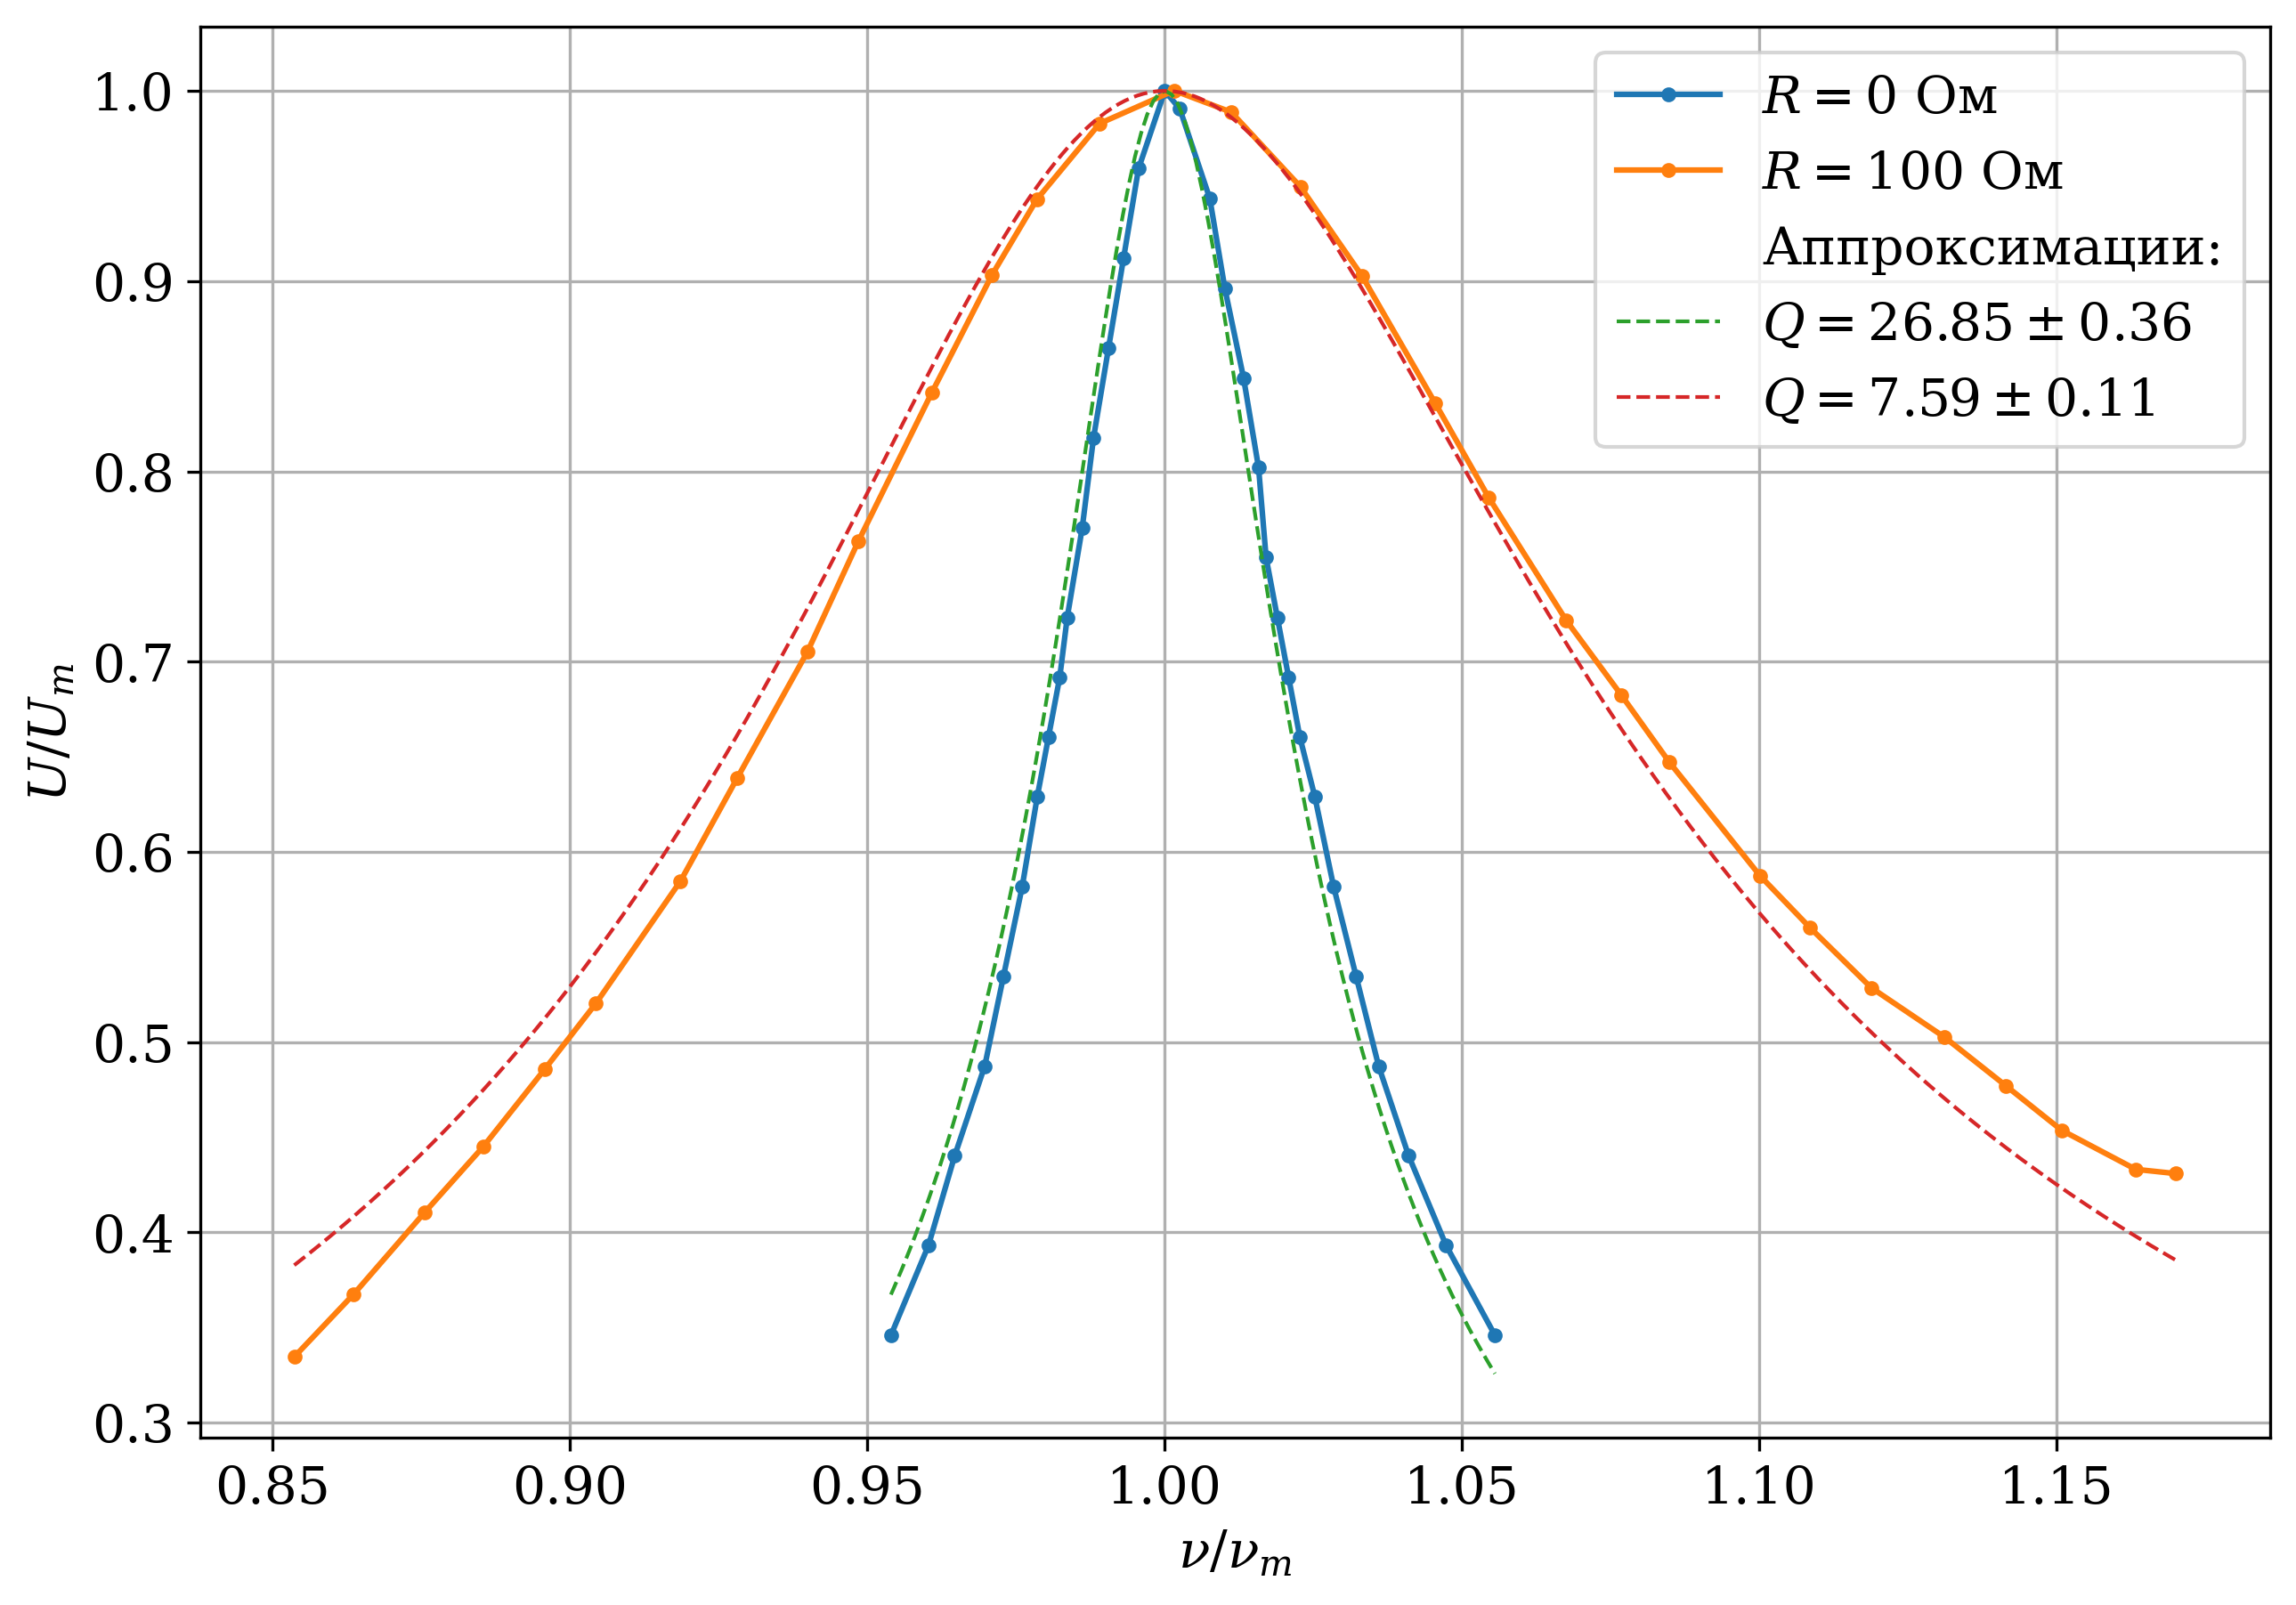

In [127]:
opt_1, cov_1 = curve_fit(res_curve,afc.iloc[:, 0], afc.iloc[:, 1] )
perr_1 = np.sqrt(np.diag(cov_1))
opt_2, cov_2 = curve_fit(res_curve,fake_x, fake_y)
perr_2 = np.sqrt(np.diag(cov_2))
print(opt_1, cov_1, perr_1)
print(opt_2, cov_2, perr_2)

x_1 = np.linspace(afc.iloc[0, 0], afc.iloc[-1, 0], 100)
x_2 = np.linspace(fake_x[0], fake_x[-1], 300)

plt.plot(afc.iloc[:, 0], afc.iloc[:, 1], marker='.', label="$R = 0$ Ом")
plt.plot(fake_x, fake_y, marker='.', label="$R = 100$ Ом")

plt.plot(1, 1, lw=0, color="yellow", label="Аппроксимации:")

plt.plot(x_1, res_curve(x_1, opt_1[0]), ls='--', lw=1, label="$Q = {:.2f} \pm {:.2f}$".format(opt_1[0], perr_1[0]))
plt.plot(x_2, res_curve(x_2, opt_2[0]), ls='--', lw=1, label="$Q = {:.2f} \pm {:.2f}$".format(opt_2[0], perr_2[0]))

# plt.title("Зависимости амплитуды от чатоты и апроксимация кривых")
plt.xlabel(r"$\nu / \nu_m$")
plt.ylabel(r"$U / U_m$")
plt.legend()

plt.savefig("plot1.png")


In [10]:
with open("zug.csv") as f:
    zug = pd.read_csv(f).drop(["Нарастание", "Убывание"], axis=1)
with open("zugr.csv") as f:
    zugr = pd.read_csv(f).drop(["Нарастание", "Убывание"], axis=1)

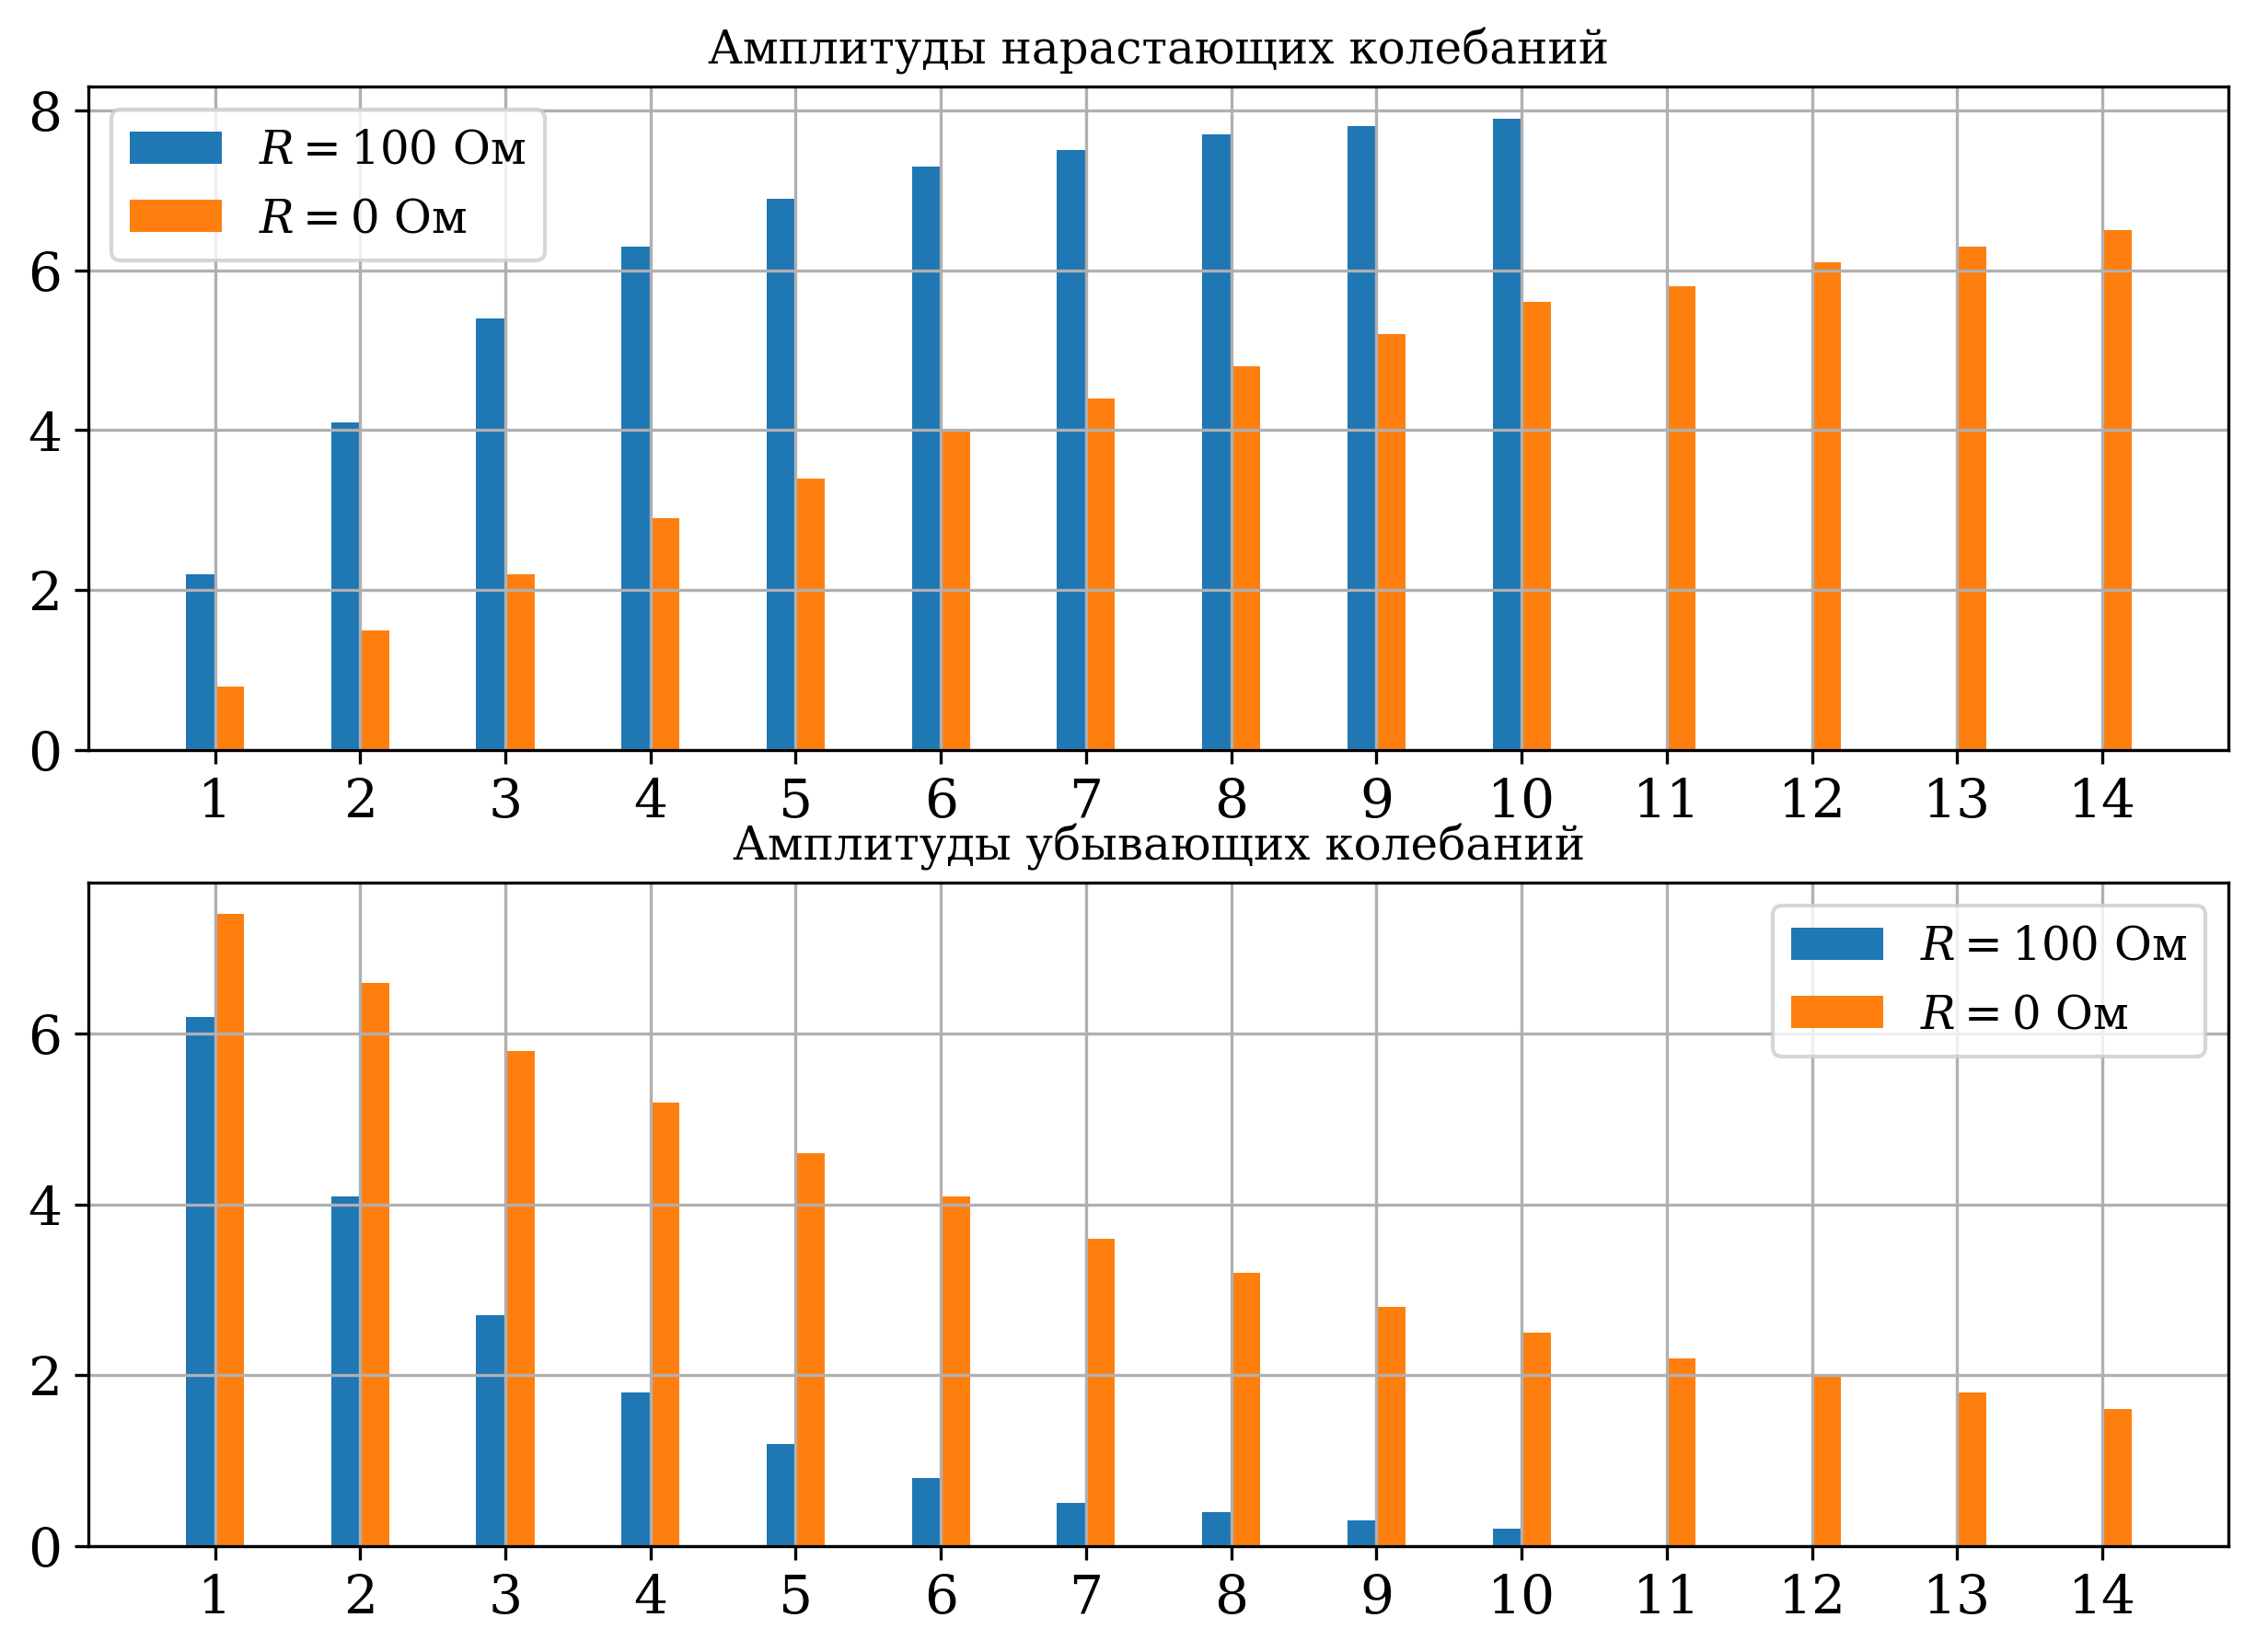

In [171]:
plt.subplot(211)
plt.xticks(np.arange(1, 15))
plt.bar(zugr.iloc[:, 0] - 0.1, zugr.iloc[:, 1], width=0.2, label="$R=100$ Ом")
plt.bar(zug.iloc[:, 0] + 0.1, zug.iloc[:, 1], width=0.2, label="$R = 0$ Ом")

plt.title("Амплитуды нарастающих колебаний", fontsize=12)
plt.legend(fontsize=12)

plt.subplot(212)
plt.xticks(np.arange(1, 15))
plt.bar(zugr.iloc[:, 2] - 0.1, zugr.iloc[:, 3], width=0.2, label="$R=100$ Ом")
plt.bar(zug.iloc[:, 2] + 0.1, zug.iloc[:, 3], width=0.2, label="$R = 0$ Ом")

plt.title("Амплитуды убывающих колебаний", fontsize=12)
plt.legend(fontsize=12)

plt.savefig("plot2.png")

In [140]:
zug

,N,A,N.1,A.1
0,1,0.8,1,7.4
1,2,1.5,2,6.6
2,3,2.2,3,5.8
3,4,2.9,4,5.2
4,5,3.4,5,4.6
5,6,4.0,6,4.1
6,7,4.4,7,3.6
7,8,4.8,8,3.2
8,9,5.2,9,2.8
9,10,5.6,10,2.5


In [166]:
step_1 = 13
err_u = 0.1

iup_1 = 1/step_1 * np.log((8 - zug.iloc[0, 1])/(8 - zug.iloc[step_1, 1]))
idw_1 = 1/step_1 * np.log((zug.iloc[0, 3])/(zug.iloc[step_1, 3]))

eiup_1 = err_u/step_1 * (abs(1/(8 - zug.iloc[0, 1])) + abs(1/(8 - zug.iloc[step_1, 1])))
eidw_1 = err_u/step_1 * (abs(1/(zug.iloc[0, 3])) + abs(1/(zug.iloc[step_1, 3])))

print(iup_1, eiup_1, idw_1, eidw_1)
print(np.pi / iup_1, np.pi / iup_1 * eiup_1 / iup_1 , np.pi / idw_1, np.pi / idw_1 * eidw_1 / idw_1)

0.12066276291644965 0.006196581196581197 0.11780587468956837 0.0058471933471933475
26.03614054292062 1.337074131408049 26.66753811614438 1.3236203361643728


In [169]:
step_2 = 6
iup_2 = 1/step_2 * np.log((8 - zugr.iloc[0, 1])/(8 - zugr.iloc[step_2, 1]))
idw_2 = 1/step_2 * np.log((zugr.iloc[0, 3])/(zugr.iloc[step_2, 3]))

eiup_2 = err_u/step_2 * (abs(1/(8 - zugr.iloc[0, 1])) + abs(1/(8 - zugr.iloc[step_2, 1])))
eidw_2 = err_u/step_2 * (abs(1/(zugr.iloc[0, 3])) + abs(1/(zugr.iloc[step_2, 3])))

print(iup_2, eiup_2, idw_2, eidw_2)
print(np.pi / iup_2, np.pi / iup_2 * eiup_2 / iup_2 , np.pi / idw_2,  np.pi / idw_2 * eidw_2 / idw_2)

0.40850084968538647 0.03620689655172414 0.4196160787684985 0.03602150537634408
7.6905412951021805 0.681640278870853 7.4868262026799135 0.6426988000628404


$$ Q = \frac{1}{R} \sqrt{\frac{L}{C}} $$

IndexError: GridSpec slice would result in no space allocated for subplot

<Figure size 3000x2100 with 0 Axes>